# Import Modules

In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn import svm

# Store Model Information

In [2]:
model_cols = ['ModelName','Accuracy','Precision','Recall','Mean Squared Error']
model_info = pd.DataFrame(columns=model_cols)

# Load Cleaned Data

In [3]:
filePath = os.path.join('../','../','../','Data','Stage','NoShowAppointments_cleaned.csv')
df = pd.read_csv(filePath,low_memory=False)

# Build data to model

In [4]:
X = df.drop(['NoShow','AppointmentID','PatientId'], axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

#instantiate mode
logmodel = LogisticRegression(verbose=True,max_iter=1000)

#fit the model with data
logmodel.fit(X_train,y_train)

#Use model to predict
y_pred = logmodel.predict(X_test)

#Evaluate accuracy of the model
acc_log = round(logmodel.score(X_test, y_test) * 100, 2)
acc_log

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished


82.78

In [6]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27752,  1449],
       [ 4831,  2442]])

In [7]:
print(metrics.classification_report(y_test, logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     29201
           1       0.63      0.34      0.44      7273

    accuracy                           0.83     36474
   macro avg       0.74      0.64      0.67     36474
weighted avg       0.81      0.83      0.81     36474



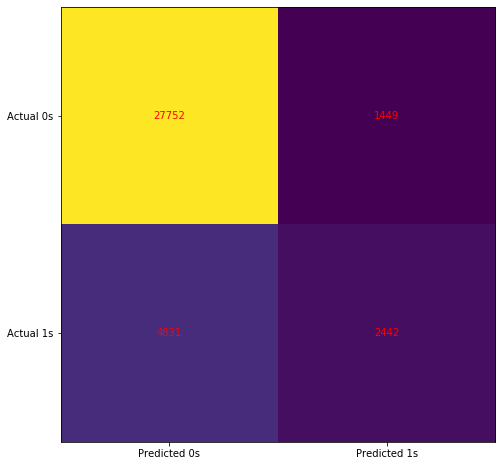

In [8]:
cm = metrics.confusion_matrix(y_test, logmodel.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8278225585348468
Precision: 0.6276021588280648
Recall: 0.3357624089096659


In [10]:
name = 'Logistic'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

In [11]:
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# Feature Importance

In [12]:
#get feature importance
predictors = X_train
selector = RFE(logmodel, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Us

In [13]:
#look at the ranking
order = selector.ranking_
order

array([ 47,  52,  79,  73,  11,  91,   1,  92, 110,   8,  82,  31,  19,
        27,  42,  71,  12,  16,  39,  41,  72,  77,  35,  49,   3,  75,
        37,  66,  48,  24,   7,  83,  25,   6,  33, 108,  10,   9,  43,
        44,  38,   5,  26,  65,  51,  34,  46,   4,  97,  14,  45,  63,
        98,  81,  93,  60,  36,  23,  84,  94,  64,  28,  95,  69, 105,
        22,  86,  30,  89,  29,  62,  15, 107,  21,  40,  50,  32,  78,
        20,  76,  59,  18, 106,  13,  58,  74,  96,  17,  67,  54,  68,
        99,  61,  85, 102,  70, 100, 103,  90,  55, 109,  53, 101,  88,
        87,  56, 104,  80,  57,   2])

In [14]:
cols = [c for c in df.columns if c not in ['NoShow', 'PatientId', 'AppointmentID']]

In [15]:
#get the detail(name of column) behind the rank
feature_rank = dict(zip(order,cols))
for f in sorted(feature_rank):
    print(f,feature_rank[f])


1 SameDayAppointment
2 NoShowSum
3 Neighborhood_COMDUSA
4 Neighborhood_ILHAS OCEANICAS DE TRINDADE
5 Neighborhood_HORTO
6 Neighborhood_ENSEADA DO SUA
7 Neighborhood_DO CABRAL
8 Age Group_Toddler/baby
9 Neighborhood_FRADINHOS
10 Neighborhood_FORTE SAO JOAO
11 Handicap
12 Neighborhood_ARIOVALDO FAVALESSA
13 Neighborhood_SANTOS DUMONT
14 Neighborhood_ITARARE
15 Neighborhood_REPUBLICA
16 Neighborhood_BARRO VERMELHO
17 Neighborhood_SAO JOSE
18 Neighborhood_SANTO ANDRE
19 Age Group_Elderly
20 Neighborhood_SANTA LUIZA
21 Neighborhood_ROMAO
22 Neighborhood_PARQUE MOSCOSO
23 Neighborhood_MARIO CYPRESTE
24 Neighborhood_DE LOURDES
25 Neighborhood_DO QUADRO
26 Neighborhood_ILHA DAS CAIEIRAS
27 Neighborhood_AEROPORTO
28 Neighborhood_MORADA DE CAMBURI
29 Neighborhood_PRAIA DO SUA
30 Neighborhood_PONTAL DE CAMBURI
31 Age Group_Adult
32 Neighborhood_SANTA HELENA
33 Neighborhood_ESTRELINHA
34 Neighborhood_ILHA DO FRADE
35 Neighborhood_CARATOIRA
36 Neighborhood_MARIA ORTIZ
37 Neighborhood_CONSOLACAO
38 

In [16]:
# show AUC
metrics.roc_auc_score(y_test, y_pred)

# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

print(precision)

[0.19940231 0.62760216 1.        ]


In [17]:
print(recall)

[1.         0.33576241 0.        ]


In [18]:
print(thresholds)

[0 1]


In [19]:
metrics.average_precision_score(y_test, y_pred)

0.34317572537899155

# Decision Tree

In [20]:
# Decision Tree
#########
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#Use model to predict
y_pred = dtree.predict(X_test)

#Evaluate accuracy of the model
acc_dtree = round(dtree.score(X_test, y_test) * 100, 2)
acc_dtree

85.12

In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8511542468607776
Precision: 0.6303733031674208
Recall: 0.6129520142994638


In [22]:
name = 'Decision Tree'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)

In [23]:
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# Random Forest

In [24]:
# Random Forest
#########
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=101, n_jobs=-1)
rfc.fit(X_train, y_train)

#Use model to predict
y_pred = rfc.predict(X_test)


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8648626418818884
Precision: 0.6440157286802655
Recall: 0.7206104771071085


In [26]:
name = 'Random Forest'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

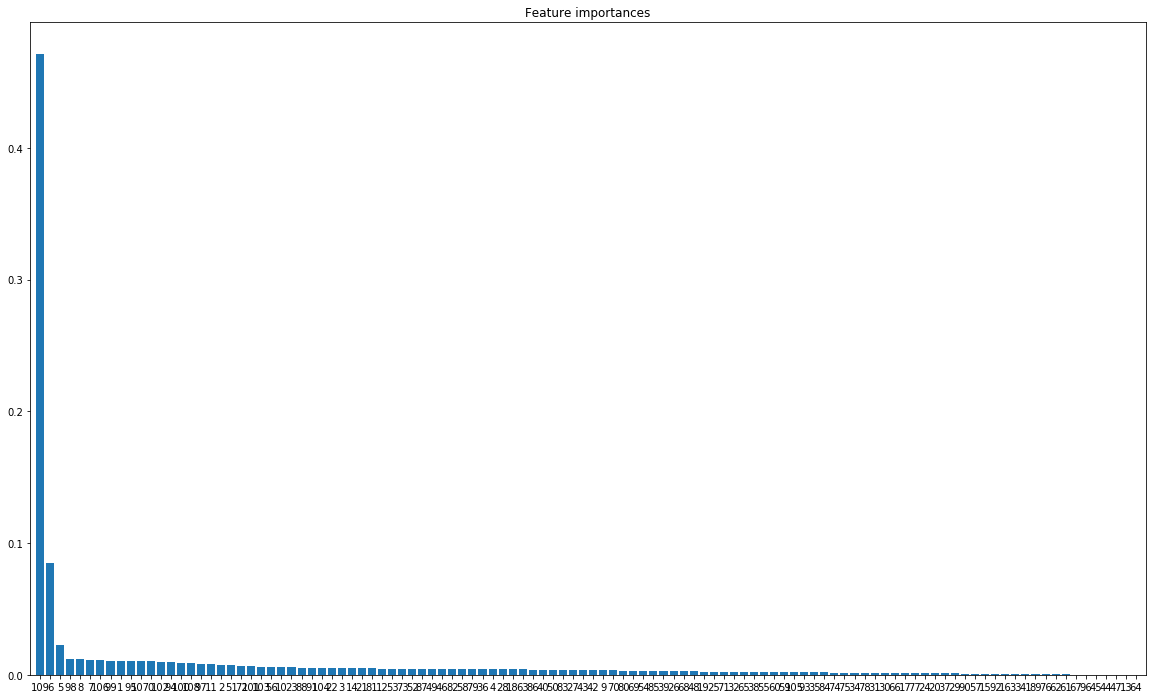

In [27]:
#Evaluate feature importance
importances = rfc.feature_importances_
std = np.std([importances for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Light GBM

In [28]:
#########
# lightGBM (LGBM)
#########
import lightgbm as lgb
#create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1', 'rmse'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

#train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

#save model to file
gbm.save_model('model.txt')

#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)



[1]	valid_0's l1: 0.313524	valid_0's rmse: 0.389455	valid_0's l2: 0.151675
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.305919	valid_0's rmse: 0.380182	valid_0's l2: 0.144538
[3]	valid_0's l1: 0.300009	valid_0's rmse: 0.373226	valid_0's l2: 0.139298
[4]	valid_0's l1: 0.293102	valid_0's rmse: 0.365296	valid_0's l2: 0.133441
[5]	valid_0's l1: 0.286541	valid_0's rmse: 0.35802	valid_0's l2: 0.128178
[6]	valid_0's l1: 0.2803	valid_0's rmse: 0.351308	valid_0's l2: 0.123417
[7]	valid_0's l1: 0.27437	valid_0's rmse: 0.345155	valid_0's l2: 0.119132
[8]	valid_0's l1: 0.268739	valid_0's rmse: 0.339531	valid_0's l2: 0.115281
[9]	valid_0's l1: 0.263381	valid_0's rmse: 0.33438	valid_0's l2: 0.11181
[10]	valid_0's l1: 0.258284	valid_0's rmse: 0.329666	valid_0's l2: 0.10868
[11]	valid_0's l1: 0.253433	valid_0's rmse: 0.325319	valid_0's l2: 0.105833
[12]	valid_0's l1: 0.248823	valid_0's rmse: 0.321357	valid_0's l2: 0.10327
[13]	valid_0's l1: 0.244437	valid_0's rmse: 0

In [29]:
gbm.feature_importance()

array([ 14,  14,   4,   8,   5,   2,  18,  16,  13,  17,  28,  10,   5,
         0,   3,   0,   1,   2,   5,   0,   0,   4,   0,   2,  11,   0,
         2,   2,   7,   2,   4,   1,   0,   0,   0,   1,  12,   0,   0,
         1,  10,   0,  10,   1,   0,   0,   4,   0,   0,  19,   0,   1,
         1,  10,   0,   1,   9,   1,   0,   1,   0,   0,   0,   1,   0,
         2,   0,   0,   1,   0,   0,   1,   3,   8,   1,   0,   0,   0,
         2,   2,   1,   5,   0,  20,   0,   0,   0,   5,  18,   0,   1,
         0,   0,   1,  22,  10,   0,   4,  12,  11,  11,   9,   6,   4,
         4,   2,   2,  23,   5, 121], dtype=int32)

In [30]:
predictions = [round(value) for value in y_pred]
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8200087733728135
Precision: 0.7418032786885246
Recall: 0.1493194005224804


In [31]:
name = 'Light GBM'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, y_pred)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# XGBOOST

In [32]:
#########
# XGBoost
#########
import xgboost as xgb

xg_log = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

xg_log.fit(X_train,y_train)

preds = xg_log.predict(X_test)

In [33]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
predictions = [round(value) for value in preds]

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("RMSE: %f" % (rmse))

Accuracy: 0.8748697702472994
Precision: 0.6271711576377805
Recall: 0.9184655575415922
RMSE: 0.353738


In [34]:
name = 'XgBoost'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# XGBOOST Cross Validation

In [35]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

params = {
    "objective": "binary:logistic",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

cv_results = xgb.cv(dtrain=data_dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse",
                    as_pandas=True,
                    seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.482813,0.000053,0.482814,0.000090
1,0.465055,0.006392,0.465046,0.006597
2,0.452204,0.006337,0.452211,0.006618
3,0.439403,0.007370,0.439415,0.007479
4,0.427698,0.011867,0.427692,0.012188


In [36]:
name = 'XgBoost With CrossValidation'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)
model_info

,ModelName,Accuracy,Precision,Recall,Mean Squared Error
0,Logistic,0.827823,0.627602,0.335762,0.172177
1,Decision Tree,0.851154,0.630373,0.612952,0.148846
2,Random Forest,0.864863,0.644016,0.720610,0.135137
3,Light GBM,0.820009,0.741803,0.149319,0.091018
4,XgBoost,0.874870,0.627171,0.918466,0.125130
5,XgBoost With CrossValidation,0.874870,0.627171,0.918466,0.125130


In [37]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.295221
Name: test-rmse-mean, dtype: float64


# XGBOOST Feature Importance

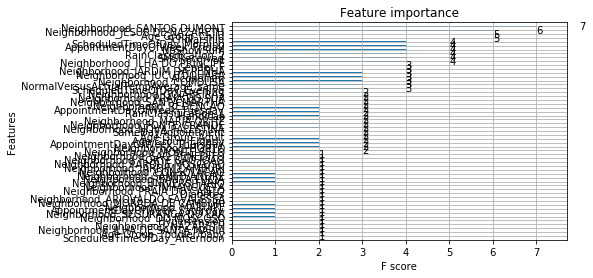

In [38]:
xg_log = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_log)
plt.rcParams['figure.figsize'] = [40, 12]
plt.show()


# TensorFlow

In [39]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = df.drop('NoShow',axis=1).values
y = df['NoShow'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=110,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [46]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 82894 samples, validate on 27632 samples
Epoch 1/600
82894/82894 [==============================] - 8s 95us/sample - loss: 0.4258 - val_loss: 0.2799
Epoch 2/600
82894/82894 [==============================] - 7s 87us/sample - loss: 0.2714 - val_loss: 0.2361
Epoch 3/600
82894/82894 [==============================] - 7s 82us/sample - loss: 0.2475 - val_loss: 0.2355
Epoch 4/600
82894/82894 [==============================] - 6s 76us/sample - loss: 0.2438 - val_loss: 0.2335
Epoch 5/600
82894/82894 [==============================] - 6s 77us/sample - loss: 0.2421 - val_loss: 0.2344
Epoch 6/600
82894/82894 [==============================] - 6s 76us/sample - loss: 0.2418 - val_loss: 0.2331
Epoch 7/600
82894/82894 [==============================] - 6s 76us/sample - loss: 0.2401 - val_loss: 0.2341
Epoch 8/600
82894/82894 [==============================] - 6s 76us/sample - loss: 0.2390 - val_loss: 0.2350
Epoch 9/600
82894/82894 [==============================] - 6s 76us/sample - loss: 0.23

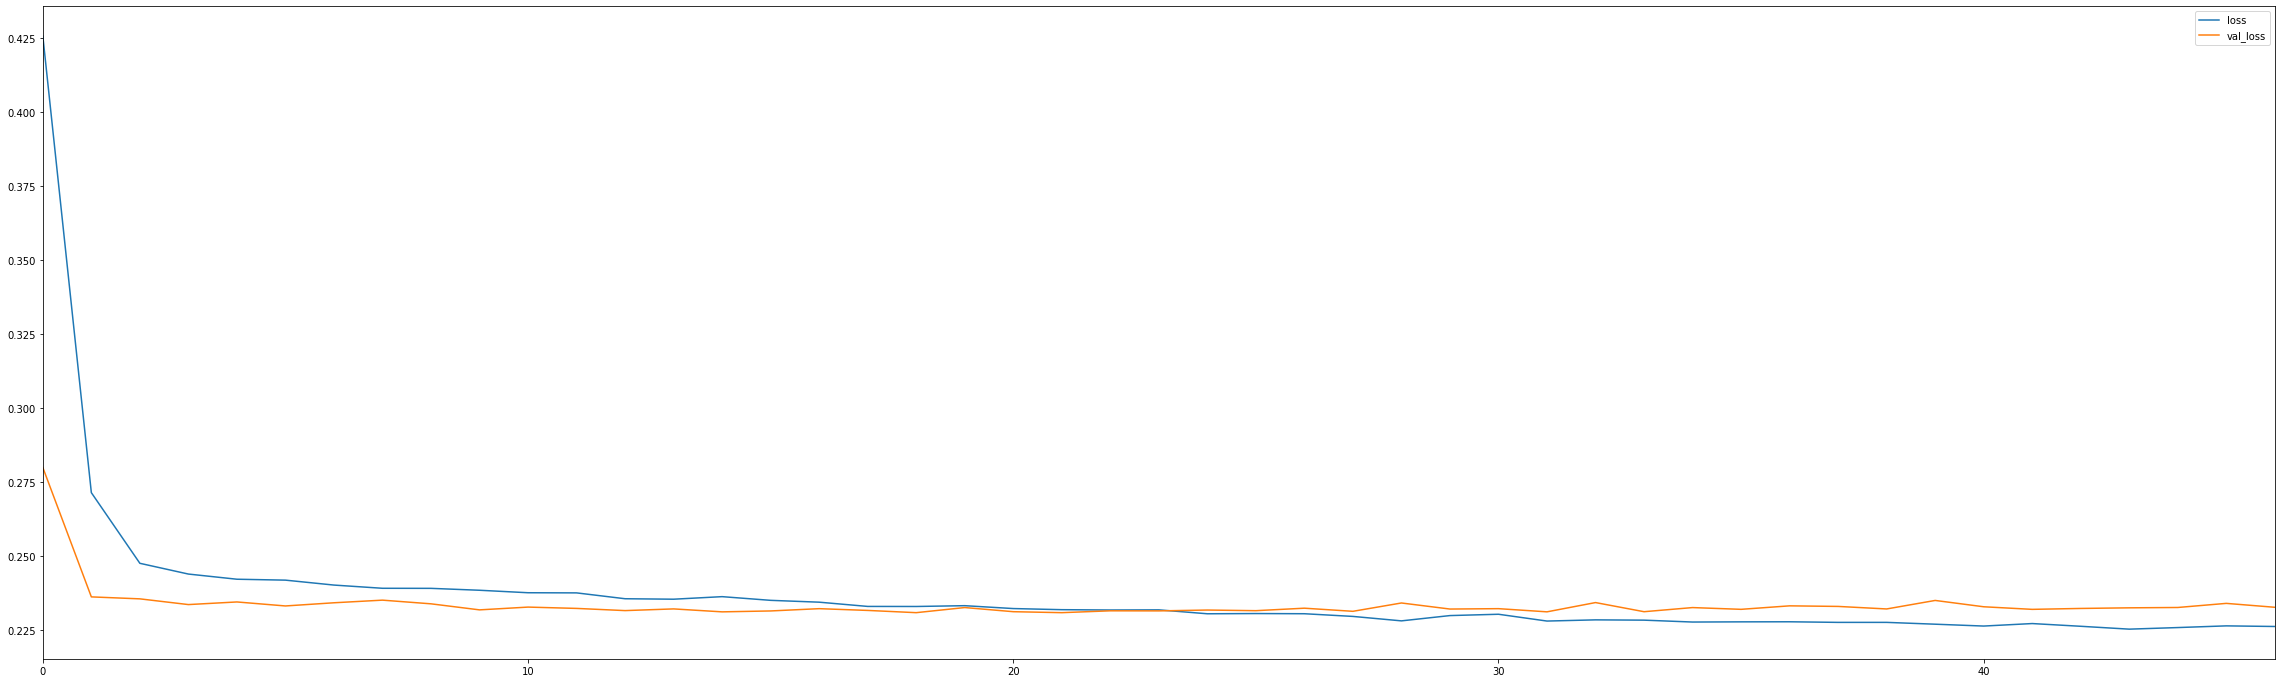

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions = model.predict_classes(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))

[[19335  2836]
 [  610  4851]]


In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8752895193977996
Precision: 0.6310654351502537
Recall: 0.8882988463651346


In [52]:
name = 'Artificial Neural Network (ANN)'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe        
    },
    ignore_index=True)

# Show Table Metrics

In [53]:
model_info

,ModelName,Accuracy,Precision,Recall,Mean Squared Error
0,Logistic,0.827823,0.627602,0.335762,0.172177
1,Decision Tree,0.851154,0.630373,0.612952,0.148846
2,Random Forest,0.864863,0.644016,0.720610,0.135137
3,Light GBM,0.820009,0.741803,0.149319,0.091018
4,XgBoost,0.874870,0.627171,0.918466,0.125130
5,XgBoost With CrossValidation,0.874870,0.627171,0.918466,0.125130
6,Artificial Neural Network (ANN),0.875290,0.631065,0.888299,0.124710
